# Feature 2 : Longer paths and player persistence

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA_FOLDER = "../data/"
PATHS_AND_GRAPH = DATA_FOLDER + "wikispeedia_paths-and-graph/"
PATHS_FINISHED = PATHS_AND_GRAPH + "paths_finished.tsv"
PATHS_UNFINISHED = PATHS_AND_GRAPH + "paths_unfinished.tsv"

# data exploration
paths_finished = pd.read_csv(
    PATHS_FINISHED,
    sep="\t",
    header=None,
    names=["hashedIpAddress", "timestamp", "durationInSec", "path", "rating"],
    encoding="utf-8",
    skiprows=16,
).copy(deep=True)
paths_finished["timestamp"] = pd.to_datetime(paths_finished["timestamp"], unit="s")

paths_unfinished = pd.read_csv(
    PATHS_UNFINISHED,
    sep="\t",
    header=None,
    names=["hashedIpAddress", "timestamp", "durationInSec", "path", "target", "type"],
    encoding="utf-8",
    skiprows=17,
).copy(deep=True)
paths_unfinished["timestamp"] = pd.to_datetime(paths_unfinished["timestamp"], unit="s")

# Remove annoying future warnings in pandas and seaborn with new python versions
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

## Do longer paths lead to the player giving up?

Can we extract some insight from this feature ?

54 paths given up on in common with finished


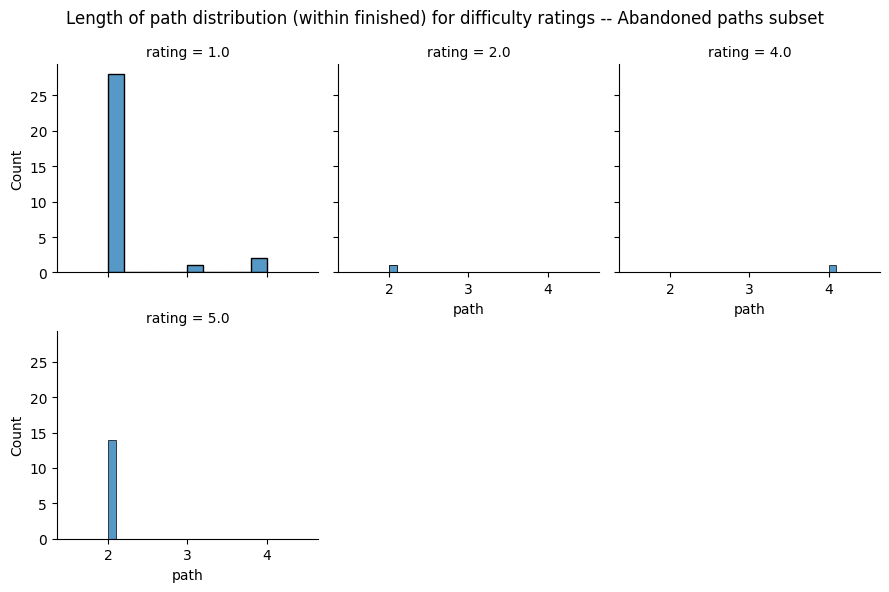

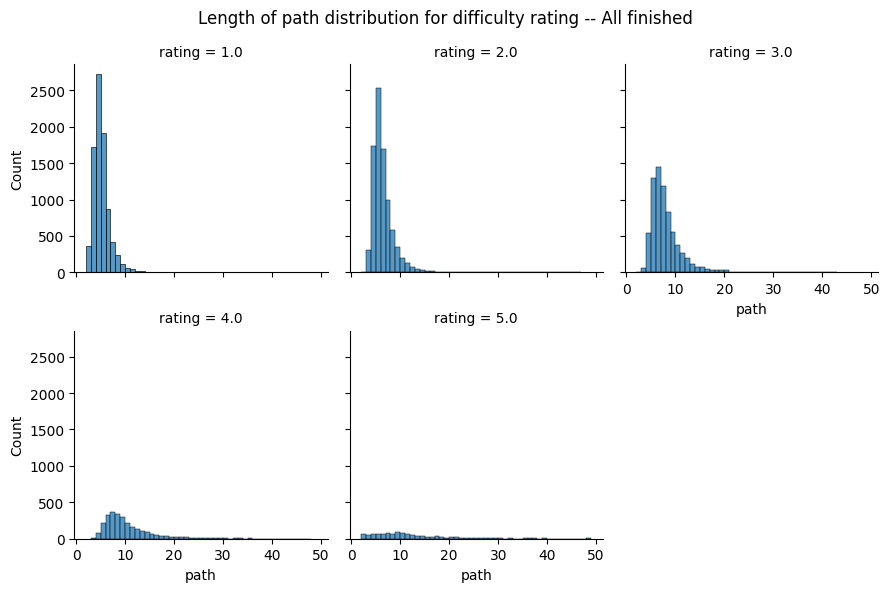

In [5]:
paths_finished_set = set(paths_finished["path"])  # Get finished paths
given_up_paths = set(paths_unfinished["path"])  # Get unfinished paths

# These are both sets of strings

common_paths = paths_finished_set.intersection(given_up_paths)
print(len(common_paths), "paths given up on in common with finished")

common_path_idx = np.concatenate(
    [np.where(paths_finished["path"] == x)[0] for x in common_paths]
)


paths_and_len_common = paths_finished.iloc[common_path_idx][["path", "rating"]].copy()
paths_and_len_common["path"] = paths_and_len_common["path"].apply(
    lambda x: len(x.split(";"))
)


p1 = sns.FacetGrid(paths_and_len_common, col="rating", col_wrap=3)
p1.map_dataframe(sns.histplot, data=paths_and_len_common, x="path", bins=10)
p1.figure.suptitle(
    "Length of path distribution (within finished) for difficulty ratings -- Abandoned paths subset"
)
p1.figure.tight_layout()
plt.show()

paths_and_len_all = paths_finished[["path", "rating"]].copy()
paths_and_len_all["path"] = paths_and_len_all["path"].apply(lambda x: len(x.split(";")))

paths_and_len_all = paths_and_len_all.sort_values(by="path")
paths_and_len_all = paths_and_len_all[:-50]

p2 = sns.FacetGrid(paths_and_len_all, col="rating", col_wrap=3)
p2.map_dataframe(sns.histplot, data=paths_and_len_all, x="path", binwidth=1)
p2.figure.suptitle("Length of path distribution for difficulty rating -- All finished")
p2.figure.tight_layout()
plt.show()